<h1>Abstract</h1>

<p style="padding: 0em 1em 0em 1em;">We visualize a dataset of Canadian earthquakes dating back to 1985. Data preprocessing is applied to extract the meaningful information which is then used in standard data visualizations as well as an interactive graphical user interface. We asked the question of why there are not very many media reports on earthquakes in Canada. Using the insights gained from our visualizations we come to a conclusion to our question.</p>

<h1>Section 1. Introduction and Motivation</h1>

<p>
When was the last time you heard of an earthquake happening in Canada? Most likely you are struggling to think of a single earthquake that has occurred within the country. Why is that? To answer this we found a dataset of all earthquakes that have taken place in the country since 1985. With this dataset we can get insight to the status of seismic activity in Canada and determine why we never hear of earthquakes.
</p>

<h3>Links</h3>
<ul>
    <li>Dataset: <a>https://open.canada.ca/data/en/dataset/2c3672b6-4c17-4ff5-9861-29e2dd6d03b3</a></li>
    <li>Canada Map: <a>https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm</a></li>
    <li>Global Earthquakes: <a>https://en.wikipedia.org/wiki/Lists_of_earthquakes?fbclid=IwAR3WluocHI8u5uYslxtOAjHrvmm4EuM3FSV5KTpePfivYwj3_ZCfNVo7FrE</a></li>
</ul

<h1>Section 2. Data Set Description, Processing, and Statistics</h1>

<h2 style="padding-left: 1em">Section 2.1 Data Set Description</h2>

<p style="padding: 0em 1em 0em 1em;">The data set that we have chosen to help us visualize has Canadian earthquake data from 1985 to 2019. It consists of 96629 entries, each containing data on a specific earthquake. The data set has multiple variables to describe each earthquake. Each entry contains the date the earthquake occured, the latitude and longitude of the earthquake, the depth of the earthquake, the magnitude of the earthquake, the type of the magnitude, and the actual city or location is occured in. Before visualizing earthquakes we must understand how they are measured. The magnitudes are measured using the Richter scale. The Richter scale is a measurement of earthquakes which tells the power of a given earthquake. This scale is logarithmic in nature meaning an earthquake of magnitude 5 is ten times stronger than one of magnitude 4. An earthquake measured to have magnitude greater than 5.9 is considered to be moderately powerful and may cause great damage in a large population dense area.
</p>
<p style="padding: 0em 1em 0em 1em;">To help visualize Canadian eathquakes compared to earthquakes from the rest of the world, we created a csv file from the deadliest earthquakes in the world each year. The data set contained 20 entries which made up the most devastating earthquakes each year from 1999 to 2019.</p>

<h2 style="padding-left: 1em">Section 2.2 Preprocessing</h2>

<p style="padding: 0em 1em 0em 1em;">To preprocess the data in the Canadian earthquakes dataset, there are two other columns of data after all the earthquake attributes that referenced what province or territory the earthquake occured in, but there were a lot of inconsistencies so we dropped both columns. To preprocess the data, we then dropped the years 1985 to 1989 because the data within this range was found to be out of step with the rest. Then, we looked at the magnitude types. We found that the type ML and MN made up more than 90% of the data set so we decided to only keep those types. The ML values are on the richter magnitude scale which is the standard way of recording earthquake magnitude. The MN values are recorded on the same scale as ML but MN is for harder rock surfaces because ML becomes inconsistent with harder rock surfaces such as granite. The other types were measured on different scales and it was hard to compare all the different types accurately. This gave us a data set of 86004 entries.
</p>
<p style="padding: 0em 1em 0em 1em;">To preprocess the second data set, we removed all columns other than the year and the magnitude of the earthquake because that is all we needed to compare. Then, we found the maximum magnitude of Canadian earthquakes each year and added them in a new column to the data set. This made it much easier to compare the values based on the years.</p>

<h1>Section 3. Visualization</h1>

<h2 style="padding-left: 1em">Section 3.1 Imports and Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import geopandas as gpd
from shapely.geometry import Point, Polygon
import tkinter as tk
from tkinter import Tk, Label, Button, Frame, Entry, Text
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('earthquakes.csv')
wiki_df = pd.read_csv('deadlyearthquakes.csv')
df = df.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1)
df.rename(columns={'magnitude': 'magn.'}, inplace=True)
df.rename(columns={'magnitude type': 'magn. type'}, inplace=True)
canada = gpd.read_file('canada/canada.shp')
canada_gui = canada

In [3]:
df = df.drop(df[(df['magn. type'] != 'ML') & (df['magn. type'] != 'MN')].index)
df = df[(df['date'] >= '1990-01-01')]
wiki_df = wiki_df.drop(['Death toll', 'Location', 'Event', 'Date'], axis=1)

<h2 style="padding-left: 1em">Section 3.2 Helper Functions</h2>

In [4]:
"""
Enter a dataframe and year to filter on

Returns a dataframe of earthquakes only from that year
"""
def filter_year(df, year):
    year_start = str(year) + '-01-01'
    year_end = str(year) + '-12-31'
    df_new = df[(df['date'] >= year_start) & (df['date'] <= year_end)]
    return df_new

"""
Enter a dataframe and magnitude to filter on

Returns a dataframe of earthquakes only with magnitude greater than the input
"""
def filter_by_magnitude(df, magnitude):
    return df[(df['magn.'] >= magnitude)]

"""
Enter a geo dataframe with longitude & latitude points and coord. limits

Returns a list with plottable which are within the limits
and the dataframe of those points
"""

# this is bugged it does not get the proper points
def get_earthquakes(geo_df, xlim_min, xlim_max, ylim_min, ylim_max):
    temp_df = geo_df.drop(geo_df[(geo_df['longitude'] <= xlim_min) & (geo_df['longitude'] >= xlim_max) &
                    (geo_df['latitude'] >= ylim_min) & (geo_df['latitude'] <= ylim_max)].index)
    points = get_geometry_points(temp_df)
    return points, temp_df

"""
Enter a geo dataframe with longitude & latitude points

Returns a list with plottable Point objects
"""
def get_geometry_points(geo_df):
    # change the colour of the points
    return [Point(xy) for xy in zip(geo_df['longitude'], geo_df['latitude'])]

<h2 style="padding-left: 1em">Section 3.3 Statistics and Visualization</h2>

<h3 style="padding-left: 1.8em">Figure 1 - Earthquakes Per Year</h3>

Text(0, 0.5, 'Number of Earthquakes')

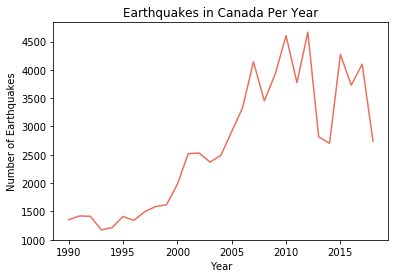

In [11]:
# What years had more earthquakes?
size = range(1990, 2019)
years = []

for i in size:
    temp = filter_year(df, str(i))
    years.append(len(temp['magn.']))
    
fig, axs = plt.subplots()
axs.plot(size, years, color = '#ED6F5B')
axs.set_title('Earthquakes in Canada Per Year')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Earthquakes')

<h3 style="padding-left: 1.8em">Figure 2 - Strongest Canadian Earthquakes Compared to the Rest of the World</h3>

Text(0, 0.5, 'Magnitude')

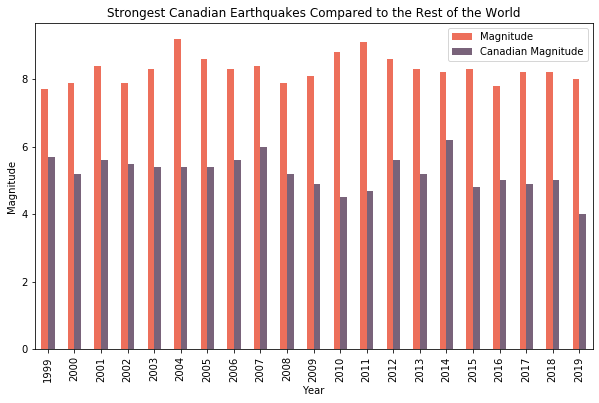

In [6]:
size = range(1999, 2020)
canada_mag = []
for i in size:
    temp = filter_year(df, str(i))
    canada_mag.append(temp['magn.'].max())
wiki_df['Canadian Magnitude'] = canada_mag

ax = wiki_df.plot.bar(x='Year',color=["#ED6F5B","#79637A"], figsize=(10,6))
ax.set_title("Strongest Canadian Earthquakes Compared to the Rest of the World")
ax.set_ylabel("Magnitude")

<h3 style="padding-left: 1.8em">Figure 3 - Canadian Earthquake Magnitude Compared to Earthquake Depth</h3>

Text(0.5, 1.0, 'Canadian Earthquake Magnitude Compared to Earthquake Depth')

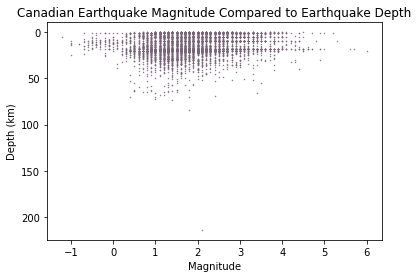

In [12]:
# depth magnitude distribution -- scatter plot
x = df.sample(8000)
q = x[['magn.', 'depth']]

ax = x.plot.scatter(x='magn.', y='depth', s=0.2, color="#79637A")
plt.gca().invert_yaxis()
ax.set_xlabel("Magnitude")
ax.set_ylabel("Depth (km)")
ax.set_title("Canadian Earthquake Magnitude Compared to Earthquake Depth")

<h3 style="padding-left: 1.8em">Figure 4 - All Earthquakes in Canada Since 1990</h3>

Text(156.375, 0.5, 'Latitude')

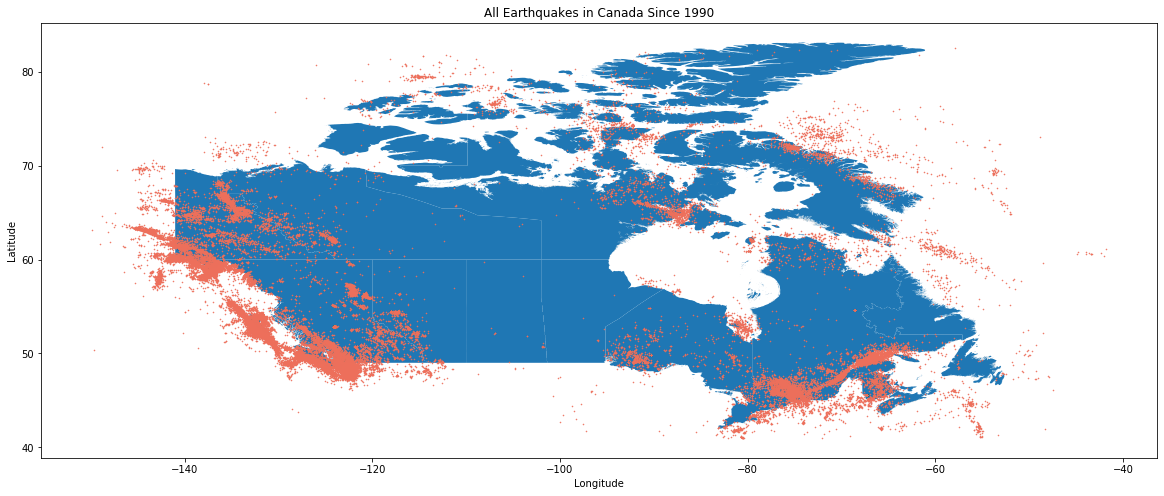

In [8]:
fig, ax = plt.subplots(figsize= (20, 15))
years = range(1990, 2020)
earthquakes = []
for year in years:
    earthquakes.append(filter_year(df, year))
_df = pd.concat(earthquakes)

# get points for each earthquake magn.
geometry = get_geometry_points(_df)

# change crs for proper projections
crs = {'init': 'EPSG:4326'}
canada = canada.to_crs('EPSG:4326')
canada_gui = canada_gui.to_crs('EPSG:4326')

# holds the earthquakes we want to display
gdf_quakes = gpd.GeoDataFrame(_df, crs=crs, geometry=geometry)

# plot map and then earthquakes on top of it
canada.plot(ax=ax)
gdf_quakes.plot(column='magn.', ax=ax, color='#ED6F5B', markersize=0.3)
ax.set_title("All Earthquakes in Canada Since 1990")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

<h3 style="padding-left: 1.8em">Figure 5 - Top 10 Strongest Earthquakes in Canada</h3>

In [9]:
# getting the 10 stronget earthquakes
big_quakes = filter_by_magnitude(df, 5)
big_quakes = big_quakes.sort_values(by=['magn.'], ascending=False)
strong_geometry = get_geometry_points(big_quakes.head(10))
big_quakes.head(10)

,date,latitude,longitude,depth,magn.,magn. type,place
77287,2014-07-25T10:54:49+0000,58.2637,-136.9037,1.0,6.2,ML,135 km WSW of Haines
43600,2007-01-09T15:49:35+0000,59.3717,-136.8723,20.0,6.0,ML,97 km W of Haines
23145,1999-12-07T05:35:58+0000,75.3847,-120.4400,18.0,5.7,ML,McClure Strait
19524,1997-12-06T08:06:47+0000,64.8442,-88.1877,18.0,5.7,MN,Wager Bay region
69273,2012-10-30T02:49:00+0000,52.2979,-132.3696,10.0,5.6,ML,112 km SSW of Sandspit
40261,2006-02-05T08:16:59+0000,66.4337,-142.3388,10.0,5.6,ML,297 km NW of Dawson
27415,2001-08-14T19:35:38+0000,76.6317,-107.2237,18.0,5.6,MN,Byam Martin Channel
69720,2012-11-05T08:12:51+0000,51.5192,-130.9022,1.0,5.5,ML,202 km SSE of Sandspit
29326,2002-04-20T10:50:47+0000,44.5335,-73.7329,18.0,5.5,MN,Plattsburgh
43130,2006-11-12T02:00:18+0000,78.6895,-137.5329,18.0,5.5,ML,Arctic Ocean


<h3 style="padding-left: 1.8em">Figure 6 - Interactive Visualization</h3>

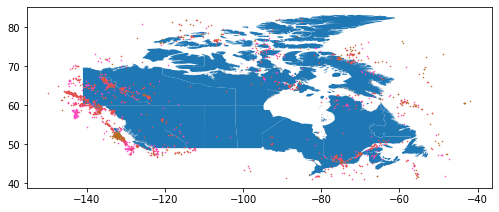

In [16]:
class InteractiveVisualization:
    def __init__(self, master):
        self.master = master
        self.configure_gui()
        self.create_widgets()
        self.plotted = False
    
    # set the main screen
    def configure_gui(self):
        self.master.title("Earthquake Visualization")
        self.master.geometry('800x500')
        self.master.resizable(0, 0)
        self.master.configure(bg="#6F7274")
        
    def create_widgets(self):
        self.create_frames()
        self.create_button()
        self.create_inputs()
        self.create_map()
        
    def create_frames(self):
        self.left_frame = Frame(width=200, height=500, background='white')
        self.left_frame.grid_propagate(0)
        self.left_frame.grid(row=0, column=0)

        self.right_frame = Frame(width=600, height=500, background='black')
        self.right_frame.grid_propagate(0)
        self.right_frame.grid(row=0, column=1) 
        
        self.right_frame.grid_rowconfigure(0, weight=1)
        self.right_frame.grid_columnconfigure(0, weight=1)
        
    def create_button(self):
        self.refresh = Button(self.left_frame, text='Refresh', command=self.refresh_map)
        self.refresh.grid(row=4, column=0, padx=30, pady=20)
    
    def create_inputs(self):
        # create start year and magnitude labels
        self.start_label = Label(self.left_frame, text="Start Year:")
        self.end_label = Label(self.left_frame, text="End Year:")
        self.magnitude_label = Label(self.left_frame, text="Magnitude:")
        self.color_label = Label(self.left_frame, text="Color Hex Code:")
        
        self.start_label.grid(row=0, column=0)
        self.end_label.grid(row=1, column=0)
        self.magnitude_label.grid(row=2, column=0)
        self.color_label.grid(row=3, column=0)
        
        # create a textbox for each
        self.start_year = Entry(self.left_frame)
        self.end_year = Entry(self.left_frame)
        self.magnitude = Entry(self.left_frame)
        self.color = Entry(self.left_frame)
        self.output_box = Text(self.left_frame, width=16, height=10)
        
        self.start_year.grid(row=0, column=1)
        self.end_year.grid(row=1, column=1)
        self.magnitude.grid(row=2, column=1)
        self.color.grid(row=3, column=1)
        self.output_box.grid(row=5)
        
        
    def create_map(self):
        self.ax = canada_gui.plot()
        fig = self.ax.get_figure()
        self.canvas = FigureCanvasTkAgg(fig, self.right_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0, sticky='NESW')

    def refresh_map(self):
        # get the input from text boxes
        start = self.start_year.get()
        end = self.end_year.get()
        magnitude = self.magnitude.get()
        user_color = self.color.get()
        
        # errorcheck the input
        try:
            # cast to int, raises ValueError if not int
            start = int(start)
            end = int(end)
            magnitude = float(magnitude)
            
            if start > end:
                self.output_box.insert('end', "Start year must be older than end year.")
                return
            # check if entered numbers are within dataset year range
            if start < 1990 or end > 2019:
                self.output_box.insert('end', "Start year must be older than end year.")
                return
            
            self.output_box.insert('end', "Start Year: {}\nEnd Year: {}\nColor: {}\n".format(start, end, magnitude))
            years = range(start, end)
            # create empty list to hold dataframes
            user_earthquakes = []

            # get all earthquakes
            for year in years:
                user_earthquakes.append(filter_year(df, year))

            # create a single dataframe of earthquakes from range
            user_df = pd.concat(user_earthquakes)
            user_df = user_df[(user_df['magn.'] >= magnitude)]
            geometry = [Point(xy) for xy in zip(user_df['longitude'], user_df['latitude'])]
            
            # if we already have points 
            if self.plotted == True:
                self.points.get_tk_widget().grid_forget()
                
           
            # geometry has all the points to plot
            user_quakes = gpd.GeoDataFrame(user_df, crs=crs, geometry=geometry)
            axis = user_quakes.plot(column='magn.', ax=self.ax, color=user_color, markersize=0.3)
            fig = axis.get_figure()     
                
            # plot points
            self.points = FigureCanvasTkAgg(fig, self.right_frame)
            self.points.draw()
            self.points.get_tk_widget().grid(row=0, column=0, sticky='NESW')
            self.plotted = True

            
        except ValueError:
            self.output_box.insert('end', "Please enter proper input.")
        

root = Tk()
my_gui = InteractiveVisualization(root)
root.mainloop()

<h1>Section 4. Results</h1>

<h2 style="padding-left: 1em">Section 4.1 Observations</h2>

<p style="padding: 0em 1em 0em 1em;">From figure 1 we see that since the year 2000, the yearly frequency of earthquakes has increased dramatically. This increase can be attributed to an actual increase of earthquakes or to an increase in instruments used to measure earthquakes.</p>
<p style="padding: 0em 1em 0em 1em;">As you can see from figure 2, Canadian earthquakes are quite small in comparison. Although we do see many earthquakes in Canada, they are not as devastating as earthquakes around the world. Each year we compared the strongest Canadian earthquake to the strongest earthquake in the world and the Canadian earthquakes are at least 2 units lower on the Richter scale. This shows that Canadian earthquakes are not near as bad as earthquakes around the world.</p>
<p style="padding: 0em 1em 0em 1em;">Figure 3 shows the relation between earthquake magnitude and earthquake depth in Canada. You can see that there is a direct relation between magnitude and depth. As the depth gets shallower, the magnitude becomes larger as the earthquake originates closer to the surface. The strongest earthquakes do not go deeper than about 25 kilometers.</p>
<p style="padding: 0em 1em 0em 1em;">Figure 4 shows us how many earthquakes have occured in the past 29 years. Evidently the west coast has many more earthquakes compared to the east coast. This difference is due to the fact that the west coast lies on a fault line, which is where earthquakes are more likely to occur. Furthermore, if we examine the shape that the earthquakes create on the west coast we see an indistinct vertical line. This line can be used to approximate how the fault line looks.</p>
<p style="padding: 0em 1em 0em 1em;">To elaborate on figure 2 we display the 10 strongest earthquakes in Canada since 1990 in figure 5. As we can see the largest earthquake is of magnitude 6.2 which is small in comparison to any of the strongest global earthquakes. Thus Canada is not in danger of a cataclysmic earthquake according to our data.</p>
<p style="padding: 0em 1em 0em 1em;">If these visualizations have left you wondering about certain years which we have not displayed feel free to explore the dataset further with our interactive visualization found in figure 6. Here you can input the start and end years as well as the minimum magnitude. The visualization will display the earthquakes given the parameters entered in the text boxes. If you would like to compare two different year ranges enter the first paramters and press refresh. Then enter a different non-overlapping year range with a different colour than the first. Here are some example parameters, press refresh after entering each one:</p>
<ul>
    <li>Start Year: 1990</li>
    <li>End Year: 1993</li>
    <li>Magnitude: 3</li>
    <li>Color: #FF49C2</li>
</ul>
<ul>
    <li>Start Year: 2000</li>
    <li>End Year: 2005</li>
    <li>Magnitude: 3</li>
    <li>Color: #E5534E</li>
</ul>
<ul>
    <li>Start Year: 2010</li>
    <li>End Year: 2019</li>
    <li>Magnitude: 4</li>
    <li>Color: #B76E21</li>
</ul>


<h2 style="padding-left: 1em">Section 4.2 Conclusion</h2>

<p style="padding: 0em 1em 0em 1em;">Returning back to our question, why do we not know much about Canadian earthquakes? Well there has been an increase of earthquakes in recent decades and each year we experience thousands of them. Although there has been an increase in Canadian earthquakes in the last 20 years, they have been moderate in strength but not strong enough to cause a reason to worry. Compared to the rest of the world, Canadian earthquakes are far weaker and do not cause as much devastation. Since they are not comparable to the rest of the world, the Canadian media does not have as many reports on them. With the lack of reports the only way to get an answer to this question is to interpret earthquake data which is what we accomplished.</p>